<a href="https://colab.research.google.com/github/pcpiscator/01T2021/blob/main/C%C3%B3pia_de_Furg_ECD_03_Machine_Learning_I_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Especialização em Ciência de Dados - FURG
## Machine Learning I - Classificação
### Prof. Marcelo Malheiros

Código adaptado de Aurélien Geron (licença Apache-2.0)

---

# Inicialização

Aqui importamos as bibliotecas fundamentais de Python para este _notebook_:

- NumPy: suporte a vetores, matrizes e operações de Álgebra Linear
- Matplotlib: biblioteca de visualização de dados
- Pandas: pacote estatístico e de manipulação de DataFrames
- Scikit-Learn: biblioteca com algoritmos de Machine Learning

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Obter os dados


Nesta atividade iremos usar o conjunto de dados MNIST, que é um conjunto de 70.000 pequenas imagens de dígitos escritos à mão. Cada imagem é identificada com o dígito que representa. Esse conjunto é bastante conhecido e também um excelente exemplo para trabalhar com tarefas de **classificação**.

O Google Colaboratory já inclui uma versão reduzida desse conjunto de dados em seu ambiente online, dentro do diretório `sample_data`. O arquivo `mnist_train_small.csv` contém o conjunto de treinamento e o arquivo `mnist_test.csv` contém o conjunto de teste, ambos rotulados com os dígitos corretos.

In [2]:
# cada linha representa um dígito: o rótulo está na coluna 0
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist_train.shape

(20000, 785)

In [3]:
mnist_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# cada linha representa um dígito: o rótulo está na coluna 0
mnist_test = pd.read_csv('sample_data/mnist_test.csv', header=None)
mnist_test.shape

(10000, 785)

In [5]:
mnist_test.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Vamos aqui separar as 784 features (pixels) de cada instância dos rótulos (dígito reconhecido). Seguiremos a convenção de **X** para features e **y** para rótulos.

Vale conferir se a separação está correta. Aqui usamos `.iloc[]` para separar uma faixa de colunas numeradas.

In [6]:
X_train = mnist_train.iloc[:,1:]
y_train = mnist_train.iloc[:,0]
X_test  = mnist_test.iloc[:,1:]
y_test  = mnist_test.iloc[:,0]
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train: (20000, 784)
y_train: (20000,)
X_test:  (10000, 784)
y_test:  (10000,)


## Visualizar os dados

Cada linha corresponde a uma matriz de 28 por 28 pixels (tons de cinza) correspondendo a uma única imagem de um dígito.

In [7]:
# função auxiliar para mostrar uma imagem
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

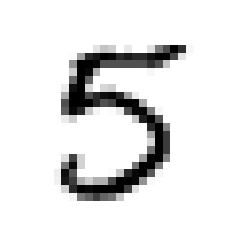

In [8]:
# imagem associada à instância de índice 1
some_digit = X_train.iloc[1].values
some_digit_image = some_digit.reshape(28, 28)
plot_digit(some_digit_image)
plt.show()

In [9]:
# rótulo associado à instância de índice 1
y_train.iloc[1]

5

In [10]:
# função auxiliar para mostrar várias imagens
def plot_digits(instances, images_per_row):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

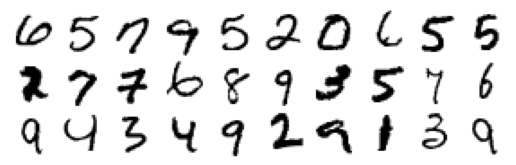

In [13]:
# exibição das 30 primeiras imagens
plt.figure(figsize=(9,9))
example_images = X_train.iloc[:30].values
plot_digits(example_images, images_per_row=10)
plt.show()

## Examinar a distribuição estatística dos rótulos

Vale a pena conferir se os dígitos dos dados de treino tem uma distribuição estatisticamente semelhante à base de testes.

In [11]:
y_train.describe()

count    20000.000000
mean         4.470200
std          2.892755
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: 0, dtype: float64

In [12]:
y_train.value_counts()

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [13]:
y_test.value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 0, dtype: int64

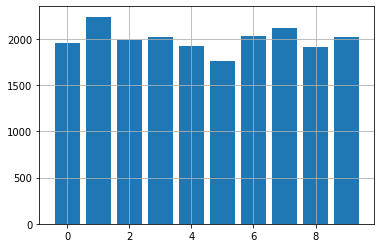

In [14]:
#y_train.hist()
y_train.hist(bins=10, range=(0,10), align='left', rwidth=0.8)
plt.show()

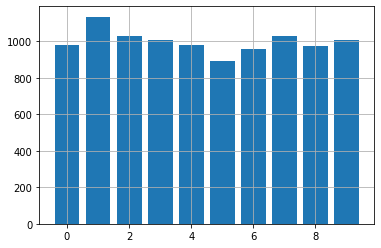

In [15]:
y_test.hist(bins=10, range=(0,10), align='left', rwidth=0.8)
plt.show()

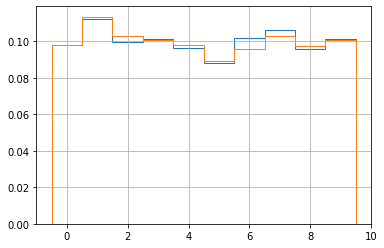

In [16]:
# histograma combinado

#y_train.hist(bins=10, range=(0,10), align='left', rwidth=0.8)
#y_test.hist( bins=10, range=(0,10), align='left', rwidth=0.8)

y_train.hist(bins=10, range=(0,10), align='left', density=True, histtype='step')
y_test.hist( bins=10, range=(0,10), align='left', density=True, histtype='step')

plt.show()

## Criar um conjunto de testes

Esta parte já está pronta. Então o conjunto de testes será deixado de lado.

# Selecionar e treinar um modelo

Podemos ir diretamente para a parte de seleção de um modelo e treinamento do mesmo.

## Classificador binário

Um classificador binário simplesmente dá uma resposta SIM ou NÃO para uma instância. Então nossos rótulos também tem que ter este formato.

Por exemplo, o classificador pode indicar se a imagem associada a uma instância representa ou não um **dígito cinco**.

In [17]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)

Pode-se começar com o classificador por Descida de Gradiente Aleatório (Stochastic
Gradient Descent - SGD), usando a classe `SGDClassifier` da biblioteca Scikit-Learn.

Este classificador tem a vantagem de ser capaz de lidar eficientemente com conjuntos de dados grandes.
Isso ocorre em parte porque o SGD lida com instâncias de treinamento de forma independente, uma de cada vez
(o que também torna o SGD adequado para aprendizado _online_).

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# predição para imagem de índice 1, que é um dígito 5
sgd_clf.predict([some_digit])[0]

True

## Medindo a acurácia usando validação cruzada

Avaliar um classificador é mais complicado do que avaliar um regressor, pois existem várias medidas de  desempenho que podem ser usadas.

A primeira medida a ser avaliada, usando **validação cruzada** do conjunto de treino, é a **acurácia** (_accuracy_).

In [20]:
# medindo a acurácia usando validação cruzada, com 3 dobras
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print(scores)

[0.96715164 0.93445328 0.96789679]


O resultado sempre acima de 93% de acurácia, que é o percentual de acertos parece muito bom!

Contudo é importante comparar este caso com um classificador trivial, que sempre responde **não** para a previsão de saída.

In [21]:
# classificador trivial que responde negativamente a todas as instâncias
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print(scores)

[0.91210439 0.9119544  0.91179118]


Ou seja, mais de 90% de acurácia. Isso ocorre simplesmente porque apenas cerca de 10% das imagens são dígitos 5, então se o classificador semrpe supor que uma imagem não é um 5, ele estará certo 90% do tempo.

Isso mostra que a acurácia geralmente não é a medida de desempenho mais adequada para classificadores, especialmente quando se está lidando com conjuntos de dados não-uniformemente distribuídos (ou seja, quando algumas das classes são muito mais frequentes do que outras).

## Matriz de confusão

Assim como a função `cross_val_score()`, a função `cross_val_predict()` validação cruzada, mas em vez de retornar as pontuações da avaliação, esta última retorna as previsões feitas em cada dobra do teste.

Isso significa que você obtém uma previsão clara para cada instância no conjunto de treinamento, justamente pela  previsão ter sido feita por um modelo que nunca viu tal instância durante o treinamento.

In [23]:
# predição para todas as instâncias, usando validação cruzada
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Cada linha em uma **matriz de confusão** representa uma classe real, enquanto cada coluna representa uma classe prevista.

In [24]:
# geração da matriz de confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[17701   538]
 [  332  1429]]


In [30]:
print('verdadeiros negativos (VN):', cm[0, 0])
print('falsos positivos      (FP):', cm[0, 1])
print('falsos negativos      (FN):', cm[1, 0])
print('verdadeiros positivos (VP):', cm[1, 1])

verdadeiros negativos (VN): 17701
falsos positivos      (FP): 538
falsos negativos      (FN): 332
verdadeiros positivos (VP): 1429


Um classificador perfeito teria apenas verdadeiros positivos e verdadeiros negativos. Então sua matriz de confusão teria valores diferentes de zero apenas em sua diagonal:

In [25]:
# classificação perfeita: igual aos valores reais
y_train_perfect_predictions = y_train_5
print(confusion_matrix(y_train_5, y_train_perfect_predictions))

[[18239     0]
 [    0  1761]]


Uma métrica interessante é a **precisão** (_precision_), definida assim:
    
\begin{equation}
\text{precisão} = \frac{VP}{VP+FP}
\end{equation}

Outra métrica chamada de **sensibilidade** (_sensitivity_) ou **revocação** (_recall_), é a proporção de instâncias positivas que são detectadas corretamente pelo classificador:

\begin{equation}
\text{sensibilidade} = \frac{VP}{VP+FN}
\end{equation}

In [26]:
# cálculo da precisão e da sensibilidade
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.726487036095577

In [27]:
recall_score(y_train_5, y_train_pred)

0.8114707552526973

A leitura que pode ser feita é que quando o classificador afirma que uma imagem representa um dígito 5, ele está **correto apenas 72,6% das vezes**. Mais ainda, este classificador detecta **apenas 81,1% dos dígitos 5 presentes**.

Muitas vezes, é conveniente combinar precisão e sensibilidade em uma única métrica chamada **pontuação F1** (_F1 score_), em paerticular para poder comparar dois classificadores.


A pontuação F1 é a média harmônica da precisão e da sensibilidade. Enquanto a média regular trata todos os valores igualmente, a média harmônica dá muito mais peso aos valores baixos:

\begin{equation}
F_1 = \frac{VP}{VP+\frac{FN+FP}{2}}
\end{equation}

Como resultado, o classificador só obterá uma pontuação F1 alta se ambos, recall e sensibilidade forem altos.

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7666309012875536

Note que a pontuação F1 favorece classificadores que têm precisão e sensibilidade semelhantes.

Isso nem sempre é o que se deseja: em alguns contextos, é importante a precisão e, em outros, a sensibilidade.

## Outro classificador binário

Agora será usado o modelo `RandomForestClassifier`.

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [30]:
# predição para todas as instâncias, usando validação cruzada
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [31]:
# geração da matriz de confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
print('verdadeiros negativos (VN):', cm[0, 0])
print('falsos positivos      (FP):', cm[0, 1])
print('falsos negativos      (FN):', cm[1, 0])
print('verdadeiros positivos (VP):', cm[1, 1])

verdadeiros negativos (VN): 18229
falsos positivos      (FP): 10
falsos negativos      (FN): 341
verdadeiros positivos (VP): 1420


In [32]:
# medidas de desempenho
from sklearn.metrics import precision_score, recall_score, f1_score

print('precisão:     ', precision_score(y_train_5, y_train_pred))
print('sensibilidade:', recall_score(y_train_5, y_train_pred))
print('pontuação f1: ', f1_score(y_train_5, y_train_pred))

precisão:      0.993006993006993
sensibilidade: 0.8063600227143668
pontuação f1:  0.8900031338138514


# Classificação multiclasse


É possível construir um classificador multiclasse usando vários classificadores binários.

Felizmente a biblioteca Scikit-Learn escolhe a estratégia automaticamente, dependendo do algoritmo selecionado.

Basta então criar o classificados e treiná-no com os rótulos completos em `y_train`, ao invés dos rótulos binários `y_train_5` usados anteriormente.

O efeito prático é que classificadores multiclasse levarão mais tempo para serem treinados. Quanto mais classes envolvidas, mais demorado será.

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

# esta chamada pode demorar um pouco
%time sgd_clf.fit(X_train, y_train)

CPU times: user 40.3 s, sys: 7.86 ms, total: 40.3 s
Wall time: 40.4 s


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
# predição para imagem de índice 1, que é um dígito 5
sgd_clf.predict([some_digit])[0]

5

Para entender como funciona um classificador multiclasse:

1. Foram treinados 10 classificadores (um para cada classe).
2. A entrada então foi aplicada em cada um dos 10, gerando 10 pontuações.
3. A previsão é dada pelo rótulo associado ao classificador com a melhor pontuação.

In [35]:
# pontuações individuais dos 10 classificadores internos
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

[[ -85437.05087203 -135532.70696043 -101833.01376653   -3855.02398457
   -60089.43095009   29372.3152098  -144521.89238795  -80689.21222431
     -582.26139392  -33002.40194553]]


In [36]:
# qual o índice que contém o maior score?
index = np.argmax(some_digit_scores)

In [37]:
# classe prevista
sgd_clf.classes_[index]

5

## Medida de desempenho por validação cruzada

In [38]:
# esta chamada pode demorar um pouco
%time cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

CPU times: user 1min 4s, sys: 264 ms, total: 1min 4s
Wall time: 1min 4s


array([0.86215689, 0.87235638, 0.85223522])

## Análise do erro

Aqui podemos gerar a previsão para todas as instâncias, usando validação cruzada. Então podemos comparar o real com o previsto em uma matriz de confusão para todas as 10 classes.

In [39]:
# esta chamada pode demorar um pouco
%time y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
cm

CPU times: user 1min 5s, sys: 229 ms, total: 1min 5s
Wall time: 1min 5s


array([[1876,    0,    6,    9,    1,   19,   15,    2,   25,    9],
       [   1, 2163,   19,    8,    8,   10,    3,    1,   25,    5],
       [  14,   44, 1633,   54,   26,   28,   34,   46,   97,   13],
       [   9,   23,   64, 1570,    7,  164,    9,   32,  109,   34],
       [   3,   15,   17,    5, 1674,   19,   21,   24,   47,   99],
       [  24,   15,   15,   52,   19, 1484,   48,   11,   71,   22],
       [   7,    3,   21,    6,   21,   61, 1902,    3,   14,    1],
       [   7,   12,   17,   10,   27,   12,    2, 1941,    9,   89],
       [   9,   58,   25,   68,   24,  212,   16,   14, 1417,   69],
       [  16,   14,    9,   33,  129,   54,    0,  147,   36, 1585]])

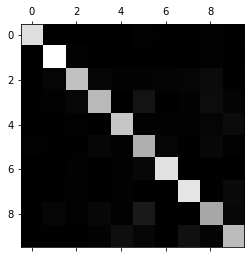

In [40]:
# exibição da matriz de confusão como imagem
plt.matshow(cm, cmap='gray')
plt.show()

Os resultados em geral são bons, pois a todos os dígitos foram em geral identificados como os próprios, como indica os valores mais claros na diagonal.

Para visualizar o erro nos demais casos, a matriz será normalizada e os elementos da diagonal serão zerados.

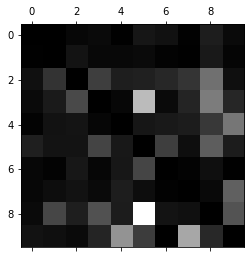

In [41]:
# normalizar a matriz
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

# zerar diagonal e exibir
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap='gray')
plt.show()

As linhas representam as classes reais, enquanto as colunas representam as classes previstas.

A coluna da classe 8 é bem clara, o que indica que muitas imagens foram classificadas incorretamente como dígitos 8. No entanto, a linha para a classe 8 não é tão ruim, informando que em geral os dígitos 8 reais são classificados corretamente como tais.

Note que a matriz de confusão não é necessariamente simétrica. Também pode ser observado que os dígitos 3 e 8 muitas vezes são erroneamente classificados como 5.

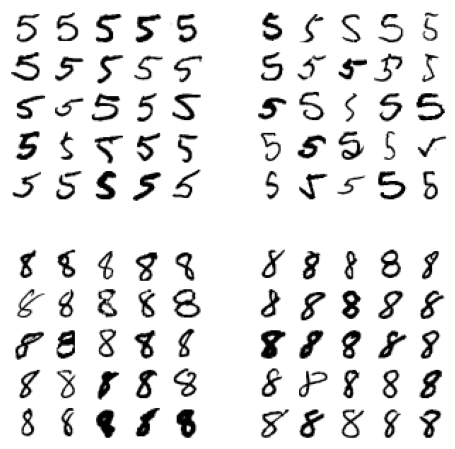

In [42]:
# exbição de algumas instâncias de 5 e 8
cl_a, cl_b = 5, 8
X_aa = X_train.values[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train.values[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train.values[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train.values[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Avaliar o modelo final

Basta usar o modelo anteriormente treinado, chamado `sgd_clf` e fazer uma previsão usando os dados de teste `X_test`, gerando as previsões  em `y_test_pred`.

As medidas de desempenho são obtidas comparando `y_test_pred` e `y_test` (que são os rótulos corretos de teste).

Vamos aqui usar as medidas de precisão, sensibilidade e pontuação F1, só que agora ajustadas para um classificador multiclasse (usando o parâmetro `average='weighted'`, que pondera as medidas de todas as classes).

In [43]:
# predição para todo o conjunto de teste
y_test_pred = sgd_clf.predict(X_test)

# medidas de desempenho
from sklearn.metrics import precision_score, recall_score, f1_score
print('precisão:     ', precision_score(y_test, y_test_pred, average='weighted'))
print('sensibilidade:', recall_score(y_test, y_test_pred, average='weighted'))
print('pontuação f1: ', f1_score(y_test, y_test_pred, average='weighted'))

precisão:      0.8798802714797115
sensibilidade: 0.8736
pontuação f1:  0.8727434534139044
